# load saved episode data and test plotting functions

Load the necessary library

In [17]:
import numpy as np
import os
import sys

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from plot_experiment import plot_episode_data_virtual, plot_one_episode, plot_trajectories_GoToXY



In [4]:
load_dir = "../evaluations/icra24/"
experiments = os.listdir(load_dir)
# remove the .png files or .csv files
experiments = [experiment for experiment in experiments if ".png" not in experiment and ".csv" not in experiment]
print(experiments)
# getting all the actions for all the episodes under the @load_dir experiments
all_actions = [pd.read_csv(load_dir + experiment + "/" + ep + "/actions.csv", index_col=None)
                        for experiment in experiments for ep in os.listdir(load_dir + experiment) if ".png" not in ep]

['nominal_GoToXY_MLP_expRew_PE_0.02', 'nominal_GoToXY_MLP_r2_expRew', 'nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.03', 'nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.01', 'nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.02', 'nominal_GoToXY_MLP_r2_expRew_PE_0.01', 'nominal_GoToXY_MLP_linRew_PE_0.04', 'nominal_GoToXY_MLP_linRew_PE_0.05', 'nominal_GoToXY_MLP_r1_expRew_PE_0.03', 'nominal_GoToXY_MLP_linRew_PE_0.02', 'nominal_GoToXY_MLP_r1_expRew_PE_0.05', 'nominal_GoToXY_MLP_linRew_PE_0.03', 'nominal_GoToXY_MLP_expRew', 'nominal_UF_0.25_GoToXY_MLP_expRew', 'nominal_GoToXY_MLP_r1_expRew_PE_0.01', 'nominal_GoToXY_MLP_expRew_PE_0.01', 'nominal_GoToXY_MLP_r1_expRew', 'nominal_GoToXY_MLP_expRew_PE_0.05', 'nominal_GoToXY_MLP_linRew', 'nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.04', 'nominal_GoToXY_MLP_expRew_PE_0.03', 'nominal_GoToXY_MLP_expRew_PE_0.04', 'nominal_GoToXY_MLP_r1_expRew_PE_0.02', 'nominal_GoToXY_MLP_r2_expRew_PE_0.02', 'nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.05', 'nominal_GoToXY_MLP_linRew_PE_0.01', 'nomi

# Go To XY TASK

Best model:
nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.05    

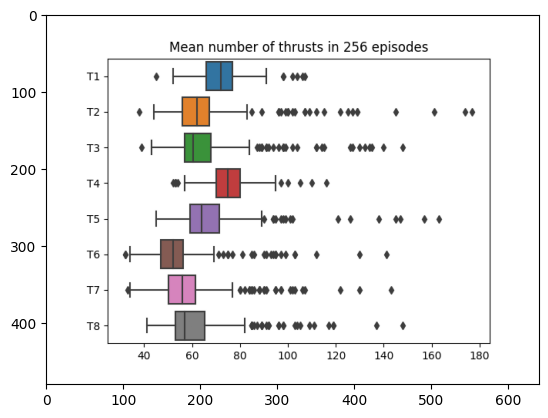

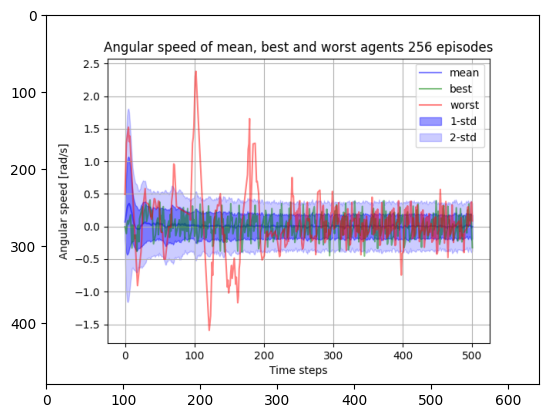

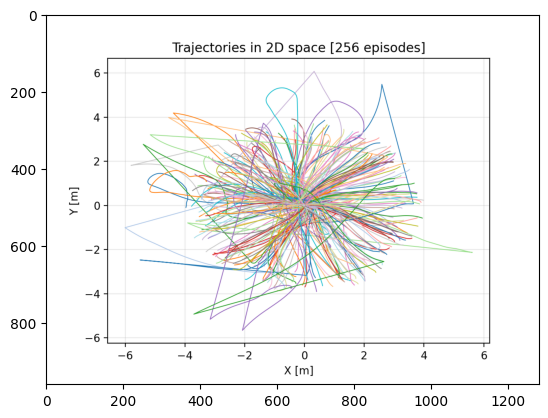

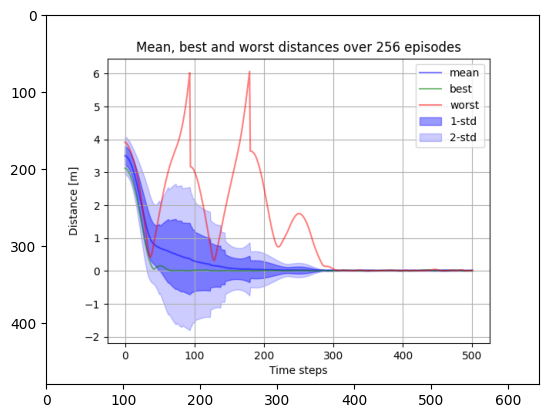

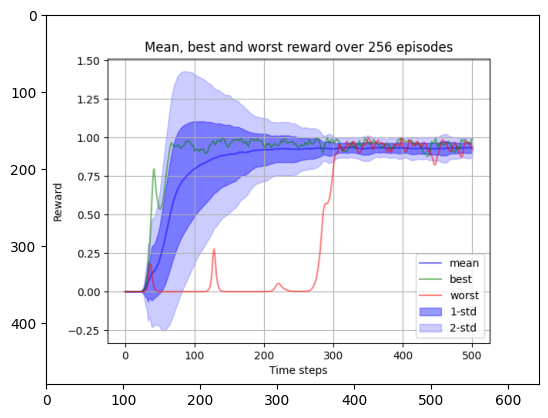

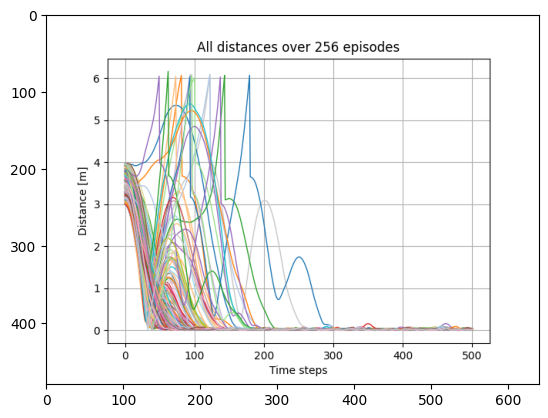

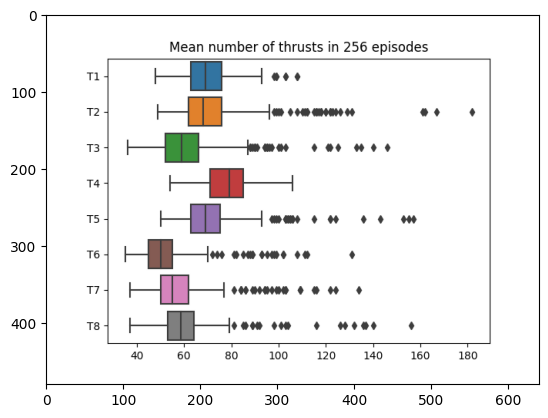

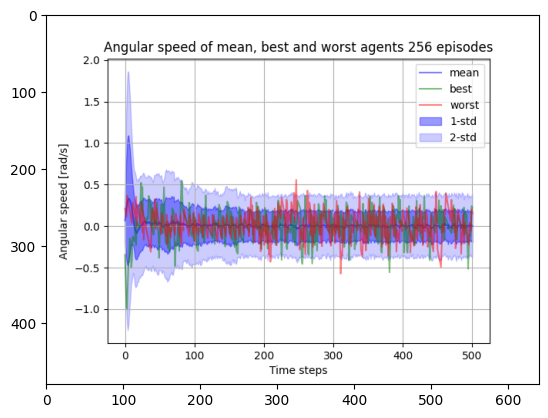

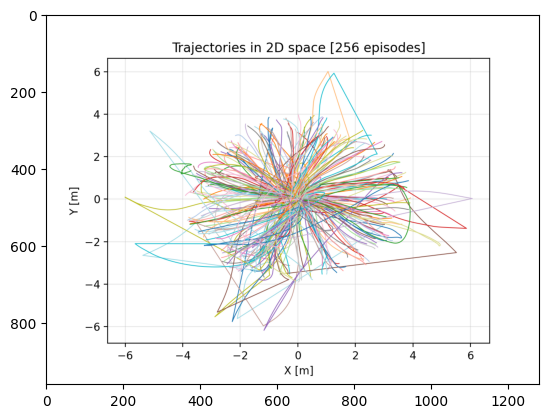

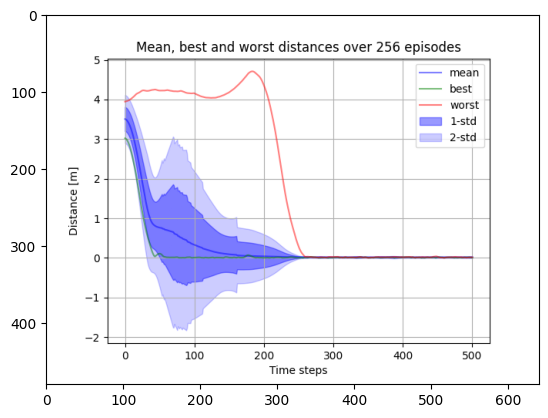

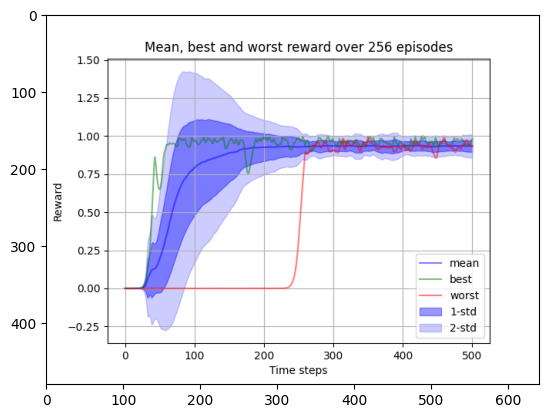

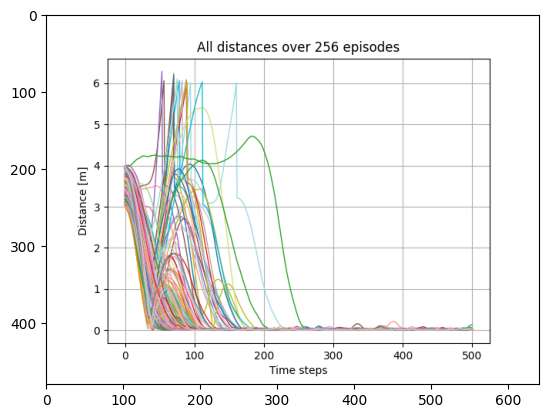

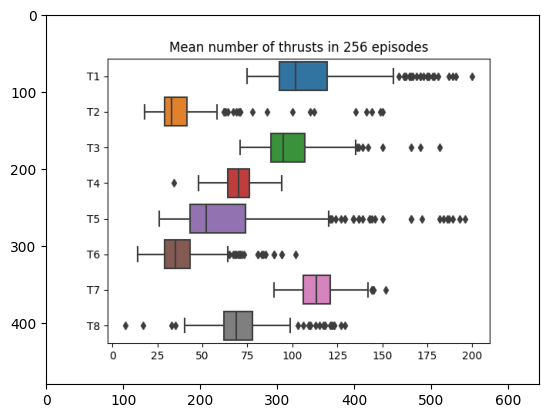

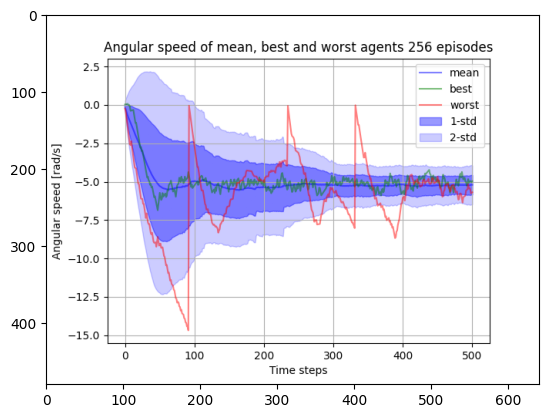

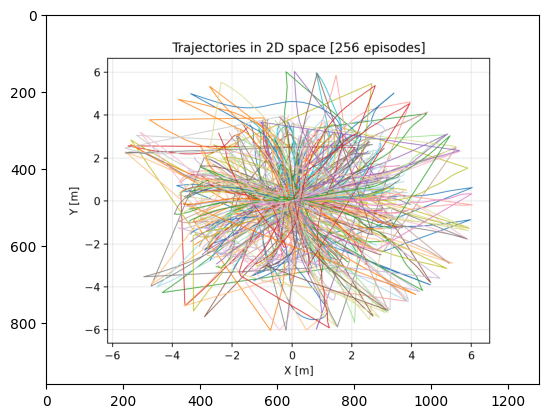

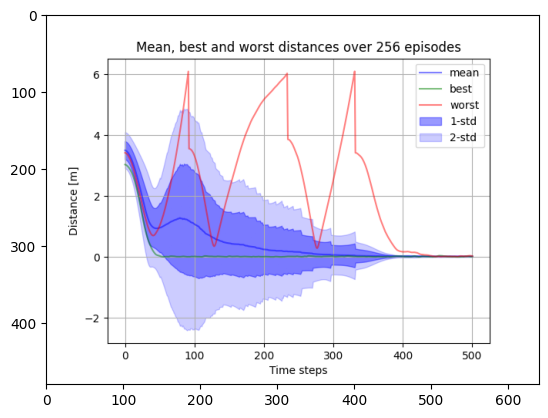

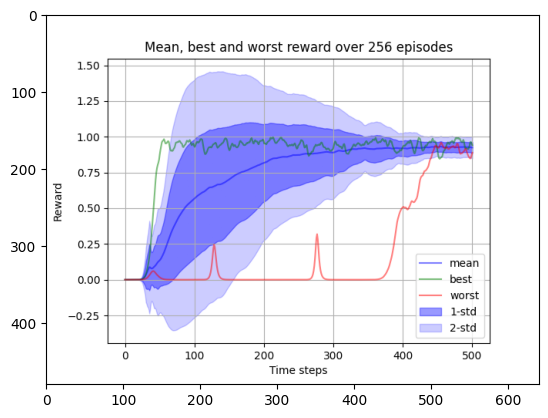

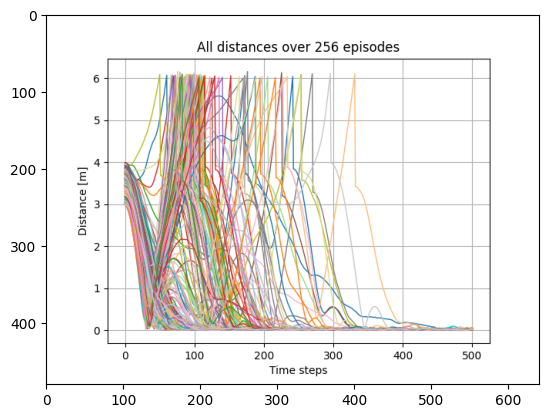

In [10]:
# Load the plots (png files) from the folder of the best model evaluated, and show them in the notebook
best_models = ['nominal_UF_0.25_GoToXY_MLP_expRew_PE_0.05', 'nominal_GoToXY_MLP_r1_expRew_PE_0.05', 'nominal_GoToXY_MLP_expRew_PE_0.05']
for best_model in best_models:
    best_model_dir = load_dir + best_model + "/"
    best_model_plots = [best_model_dir + ep for ep in os.listdir(best_model_dir) if ".png" in ep]
    for plot in best_model_plots:
        plt.figure()
        plt.imshow(plt.imread(plot))
        plt.show()



In [34]:
# load all the saved episode data from the lab experiments (csv files) and plot the trajectories using the method plot_episode_data_virtual (plot_trajectories_GoToXY)
lab_exp_dir = "../ros_lab_exp/5_9_23/nominal_UF_0.25_GoToPose_MLP_expRew_PE_0.03"
lab_exp_episodes = os.listdir(lab_exp_dir)

# collect all the states for all the episodes
all_states = np.array([])
for episode in lab_exp_episodes:
    states = np.load(lab_exp_dir + "/" + episode + "/obs.npy", allow_pickle=True)
    print(states.shape)
    #fill with zeros to make the same size
    if states.shape[0] < all_states.shape[0]:
        all_states = np.concatenate((states, np.zeros((all_states.shape[0] - states.shape[0], states.shape[1]))), axis=0)
    else:
        all_states = np.concatenate((all_states, states), axis=0)
        
# plot the trajectories using function: plot_trajectories_GoToXY(state_history:np.ndarray, save_dir:str, fig_count:int, **kwargs) -> int:
plot_trajectories_GoToXY(np.array(all_states), save_dir=lab_exp_dir + "/trajectories.png", fig_count=0)
# show the trajectories
plt.figure()
plt.imshow(plt.imread(lab_exp_dir + "/trajectories.png"))
plt.show()




(298, 1, 10)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 3 dimension(s)

In [13]:
lab_exp_episodes

[]